<a href="https://colab.research.google.com/github/TrongAnh2210/AI_Homework/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)
     

Mounted at /content/gdrive


In [31]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [52]:
folder = '/content/gdrive/MyDrive/khuon_mat'
photos, labels = list(), list()
# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if  file.startswith('binh'):
        output = 1.0
  elif file.startswith('dangkhoa'):
        output = 2.0
  elif file.startswith('quanghuy'):
        output = 3.0
  elif file.startswith('ha'):
        output = 4.0
  elif file.startswith('hieu'):
        output = 5.0
  elif file.startswith('hoang'):
        output = 6.0
  elif file.startswith('khuong'):
        output = 7.0
  elif file.startswith('kyanh'):
        output = 8.0
  elif file.startswith('hoaiphong'):
        output = 9.0
  elif file.startswith('hau'):
        output = 10.0    
  elif file.startswith('duynhat'):
        output = 11.0
  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/result_recognition/face_photos.npy', photos)
save('/content/gdrive/MyDrive/result_recognition/face_labels.npy', labels)

(334, 30, 40, 3) (334,)


In [33]:

# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/result_recognition/face_photos.npy')
labels = np.load('/content/gdrive/MyDrive/result_recognition/face_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:7], labels[:7]
train_x, train_y = photos[7:], labels[7:]

In [34]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [35]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 40, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 8, 64)          36928     
                                                                 
 conv2d_33 (Conv2D)          (None, 6, 8, 64)         

In [36]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=20), epochs=54, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/54
17/17 [==============================] - 3s 27ms/step - loss: 2.2043 - accuracy: 0.3303 - val_loss: 3.9659 - val_accuracy: 0.0000e+00
Epoch 2/54
17/17 [==============================] - 0s 16ms/step - loss: 2.0493 - accuracy: 0.3761 - val_loss: 3.4281 - val_accuracy: 0.0000e+00
Epoch 3/54
17/17 [==============================] - 0s 17ms/step - loss: 2.0009 - accuracy: 0.3700 - val_loss: 3.4115 - val_accuracy: 0.0000e+00
Epoch 4/54
17/17 [==============================] - 0s 17ms/step - loss: 1.9844 - accuracy: 0.3700 - val_loss: 3.6929 - val_accuracy: 0.0000e+00
Epoch 5/54
17/17 [==============================] - 0s 16ms/step - loss: 1.9719 - accuracy: 0.3761 - val_loss: 3.5534 - val_accuracy: 0.0000e+00
Epoch 6/54
17/17 [==============================] - 0s 16ms/step - loss: 1.9275 - accuracy: 0.4006 - val_loss: 3.6984 - val_accuracy: 0.0000e+00
Epoch 7/54
17/17 [==============================] - 0s 17ms/step - loss: 1.8253 - accuracy: 0.4587 - val_loss: 3.2382 - val_accura

Test loss: 0.03424675017595291
Test accunacy 1.0


Text(0.5, 1.0, 'Training & Testing Accuracy')

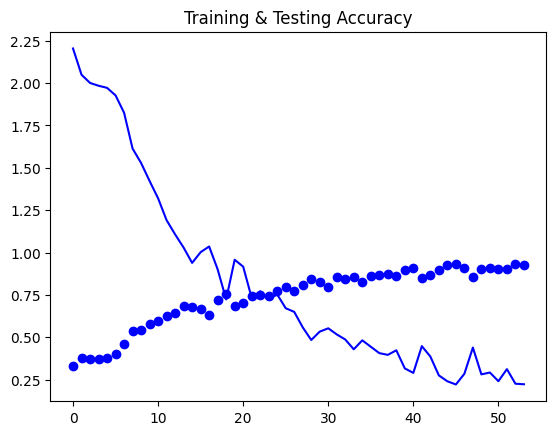

In [37]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [38]:
model.save('/content/gdrive/MyDrive/result_recognition/FACE.h5')

1/1 [==============================] - 0s 20ms/step
hoang


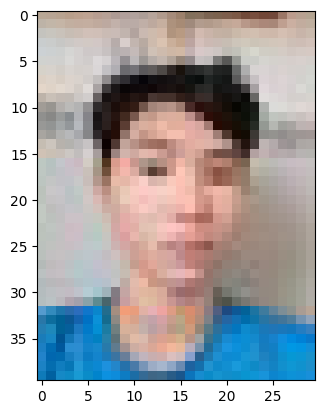

1/1 [==============================] - 0s 20ms/step
ha


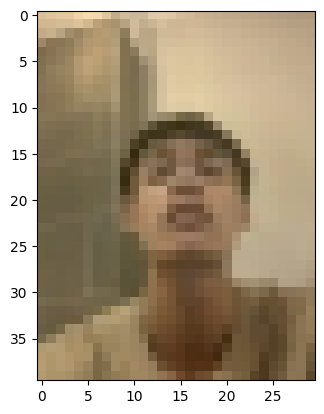

1/1 [==============================] - 0s 22ms/step
kyanh


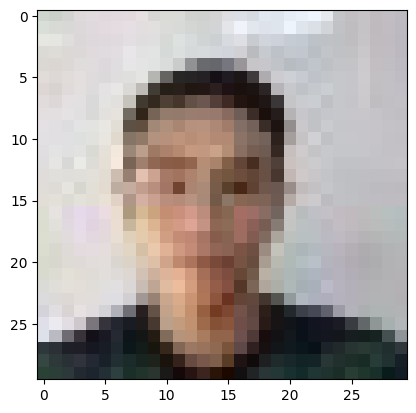

1/1 [==============================] - 0s 20ms/step
quanghuy


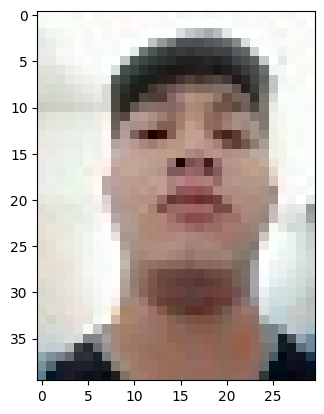

1/1 [==============================] - 0s 20ms/step
hoaiphong


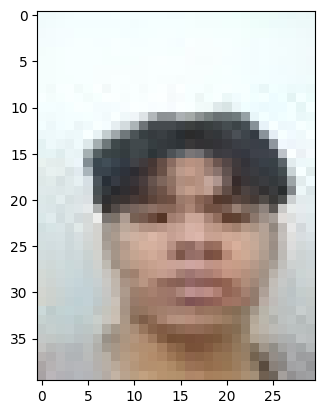

1/1 [==============================] - 0s 20ms/step
duynhat


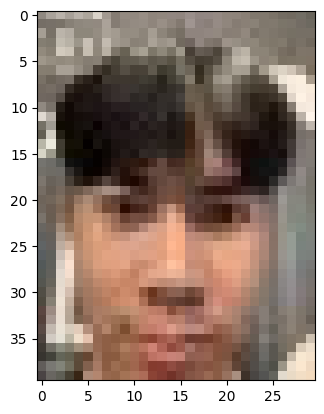

1/1 [==============================] - 0s 20ms/step
binh


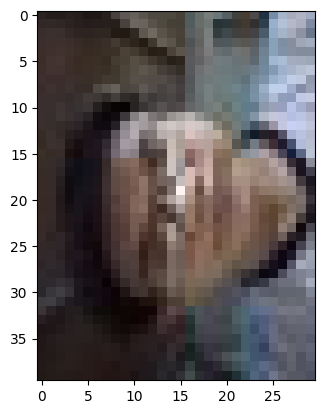

1/1 [==============================] - 0s 20ms/step
khuong


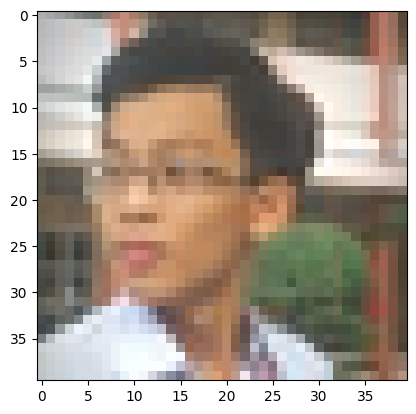

1/1 [==============================] - 0s 20ms/step
ha


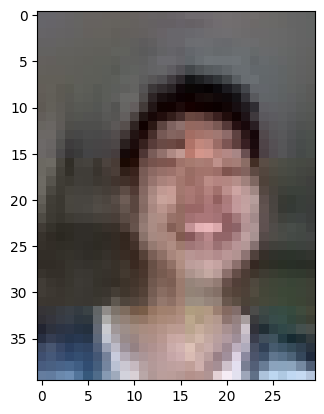

1/1 [==============================] - 0s 19ms/step
hieu


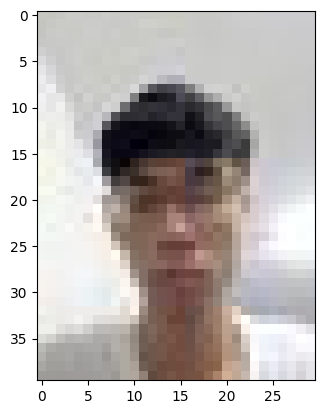

In [51]:

#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/khuon_mat_test'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','binh', 'dangkhoa', 'quanghuy', 'ha', 'hieu', 'hoang',
              'khuong', 'kyanh', 'hoaiphong', 'hau', 'duynhat']
  print(class_name[result])
  plt.show()